In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_movies = pd.read_csv('D:\programs\data_science\ml-latest-small\movies.csv')
data_tages = pd.read_csv('D:\programs\data_science\ml-latest-small/tags.csv')
data_ratings = pd.read_csv('D:\programs\data_science\ml-latest-small/ratings.csv')

In [3]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data_movies.movieId.value_counts(),print('Number of duplicated unique ids are: ',data_movies.movieId.duplicated().sum())


Number of duplicated unique ids are:  0


(movieId
 1         1
 53322     1
 53129     1
 53138     1
 53140     1
          ..
 4390      1
 4392      1
 4393      1
 4394      1
 193609    1
 Name: count, Length: 9742, dtype: int64,
 None)

In [5]:
data_tages

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
data_tages.movieId.value_counts()

movieId
296     181
2959     54
924      41
293      35
7361     34
       ... 
3307      1
3310      1
3317      1
830       1
2719      1
Name: count, Length: 1572, dtype: int64

In [7]:
data_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
data_ratings.movieId.value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [9]:
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [10]:
merge.drop(columns=['tag','timestamp','genres'],inplace=True)
merge

,movieId,title,userId
0,1,Toy Story (1995),336
1,1,Toy Story (1995),474
2,1,Toy Story (1995),567
3,2,Jumanji (1995),62
4,2,Jumanji (1995),62
...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),62
3679,193565,Gintama: The Movie (2010),184
3680,193565,Gintama: The Movie (2010),184
3681,193565,Gintama: The Movie (2010),184


In [11]:
len(merge.userId.unique()) 

58

In [12]:
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


In [13]:
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

In [14]:
len(merge.userId.unique())
len(merge_list)

58

In [26]:
pd.get_dummies
from mlxtend.preprocessing import TransactionEncoder


In [27]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [28]:
df.head()

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.shape

(58, 1572)

In [30]:
#apriori
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True,max_len=2)

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
2    774986
1      1572
Name: count, dtype: int64

In [32]:
#fpgrowth
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

CPU times: total: 0 ns
Wall time: 0 ns


,support,itemsets
0,0.051724,(Step Brothers (2008))
1,0.034483,"(Wolf of Wall Street, The (2013))"
2,0.017241,(Warrior (2011))
3,0.051724,"(Departed, The (2006))"
4,0.034483,"(Godfather: Part II, The (1974))"


In [33]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
2    774986
1      1572
Name: count, dtype: int64

In [34]:
#analysis
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1,0.034483,"(Wolf of Wall Street, The (2013))",1
2,0.017241,(Warrior (2011)),1
3,0.051724,"(Departed, The (2006))",1
4,0.034483,"(Godfather: Part II, The (1974))",1
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,"(Staying Alive (1983), Night of the Shooting S...",2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,(Night of the Shooting Stars (Notte di San Lor...,2


In [35]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)
rules

CPU times: total: 7.06 s
Wall time: 9.92 s


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Anchorman: The Legend of Ron Burgundy (2004)),(Step Brothers (2008)),0.068966,0.051724,0.034483,0.500000,9.666667,0.030916,1.896552,0.962963
1,(Step Brothers (2008)),(Anchorman: The Legend of Ron Burgundy (2004)),0.051724,0.068966,0.034483,0.666667,9.666667,0.030916,2.793103,0.945455
2,(Corpse Bride (2005)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414,0.890909
3,(Step Brothers (2008)),(Corpse Bride (2005)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414,0.890909
4,(City of God (Cidade de Deus) (2002)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414,0.890909
...,...,...,...,...,...,...,...,...,...,...
1549967,(Night of the Shooting Stars (Notte di San Lor...,(Gladiator (2000)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf,0.982456
1549968,(Night of the Shooting Stars (Notte di San Lor...,(I'm Not Scared (Io non ho paura) (2003)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf,0.982456
1549969,(I'm Not Scared (Io non ho paura) (2003)),(Night of the Shooting Stars (Notte di San Lor...,0.034483,0.017241,0.017241,0.500000,29.000000,0.016647,1.965517,1.000000
1549970,(Hard-Boiled (Lat sau san taam) (1992)),(John Wick: Chapter Two (2017)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf,0.982456


In [36]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].sort_values(ascending=False,by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1534852,(Inception (2010)),(Gentlemen Broncos (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1538020,(Inception (2010)),(Rare Exports: A Christmas Tale (Rare Exports)...,0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1538286,(Inception (2010)),((500) Days of Summer (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345,1.000000
1538320,(Inception (2010)),"(Avengers, The (2012))",0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034,1.000000
1538360,(Inception (2010)),(Captain Phillips (2013)),0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034,1.000000
...,...,...,...,...,...,...,...,...,...,...
36,(Inception (2010)),(Step Brothers (2008)),0.068966,0.051724,0.017241,0.25,4.833333,0.013674,1.264368,0.851852
6182,(Inception (2010)),(Pulp Fiction (1994)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379,0.777778
10874,(Inception (2010)),(Fight Club (1999)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379,0.777778
460,(Inception (2010)),(Anchorman: The Legend of Ron Burgundy (2004)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379,0.777778


In [37]:
#A less messy way to group the top 10 related movies to the selected one. 
#We can see here the selected movie inception has top values of lift on related movie due to the same director in them (Dunkirk)
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents        consequents                                             
(Inception (2010)) (Gentlemen Broncos (2009))                          14.5
                   (Life Aquatic with Steve Zissou, The (2004))        14.5
                   (400 Blows, The (Les quatre cents coups) (1959))    14.5
                   (A Pigeon Sat on a Branch Reflecting on Existen...  14.5
                   (Arrival (2016))                                    14.5
                   (Andalusian Dog, An (Chien andalou, Un) (1929))     14.5
                   (Angel's Egg (Tenshi no tamago) (1985))             14.5
                   (Illusionist, The (2006))                           14.5
                   (Dunkirk (2017))                                    14.5
                   (Don't Breathe (2016))                              14.5

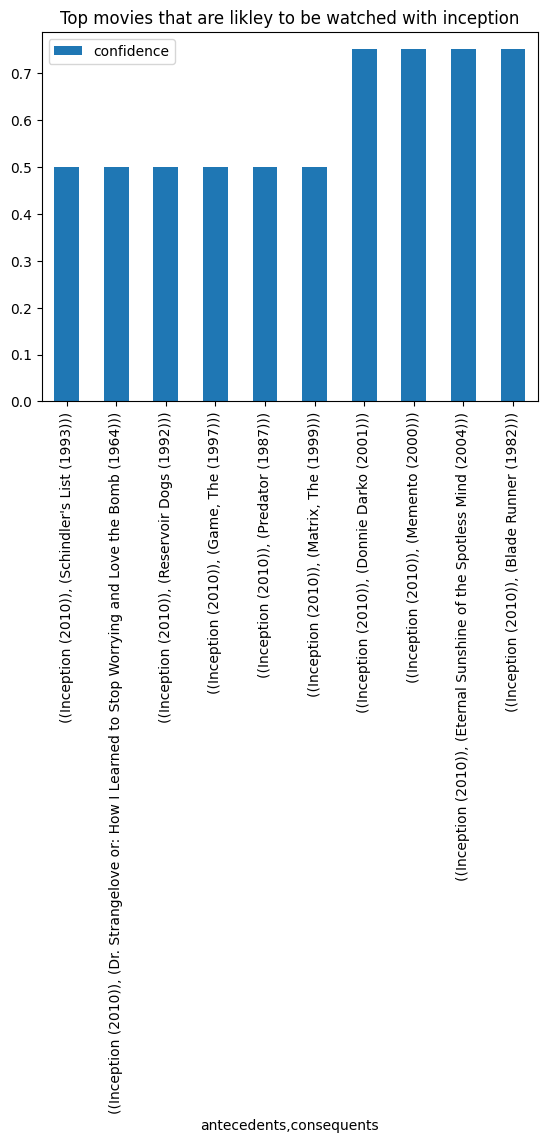

In [38]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');